In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import scikitplot as skplt

In [4]:
data=pd.read_csv('estrescape.csv',sep=';') # Base de datos para Cape con estres percibido

In [5]:
X=data.iloc[:,range(1,7)] #Se toman las variables independientes que serían las CAPE

In [6]:
y=data.iloc[:,0]#Se toman los valores de la variable a predecir (Estres percibido)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5) #Se crean los valores 
                                                                                #para las variables de entrenamiento y testeo
                                                                                #Para el ejercicio 80% de entrenamiento 20% de testing

In [8]:
knn=KNeighborsClassifier(n_neighbors=5) #Kneiggbors con 5 vecinos

In [9]:
knn.fit(X_train,y_train) #Se entrena el modelo

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
y_predict_knn=knn.predict(X_test) #Se crean las variables a predecir

In [11]:
accuracy_score(y_test,y_predict_knn) #Se mide la precisión del modelo 

0.7241379310344828

In [12]:
naive=GaussianNB() #Naive Bayes

In [13]:
naive.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
y_predict_naive=naive.predict(X_test)

In [15]:
accuracy_score(y_test,y_predict_naive)

0.5862068965517241

In [18]:
tree=DecisionTreeClassifier(criterion='gini',random_state=7,max_depth=3, min_samples_leaf=5)

In [19]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [20]:
y_predict_tree=tree.predict(X_test)

In [21]:
accuracy_score(y_test,y_predict_tree)

0.7068965517241379

In [22]:
svm=SVC() #Support Vector Machine

In [23]:
svm.fit(X_train,y_train)

c:\users\316d-08\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
y_predict_svm=svm.predict(X_test)

In [26]:
accuracy_score(y_test,y_predict_svm)

0.7068965517241379

In [52]:
randomforest=RandomForestClassifier(n_estimators=20000)

In [53]:
randomforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
y_predict_randomforest=randomforest.predict(X_test)

In [55]:
accuracy_score(y_test,y_predict_randomforest)

0.7413793103448276

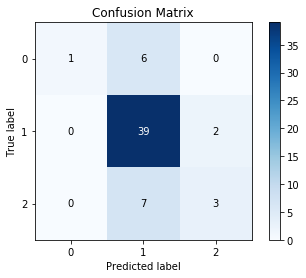

In [59]:
skplt.metrics.plot_confusion_matrix(y_test, y_predict_randomforest, normalize=False)
plt.show()

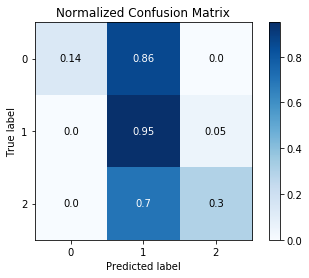

In [60]:
skplt.metrics.plot_confusion_matrix(y_test, y_predict_randomforest, normalize=True)
plt.show()

([<matplotlib.axis.YTick at 0x1c3a7cb0>,
 <a list of 6 Text yticklabel objects>)

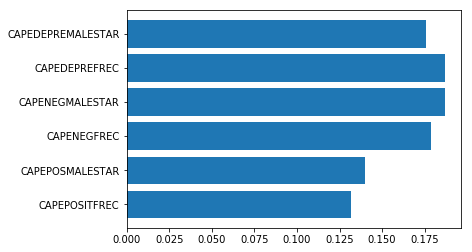

In [67]:
x=list(X.axes[1]) #Se ubican los nombres de las variables dependientes
caract=len(X.axes[1]) #Se determina el número de columnas
plt.barh(range(caract),radomforest.feature_importances_)#Presenta la variable que más aporta al modelo
plt.yticks(np.arange(caract),x)

In [61]:
neuralnetwork=MLPClassifier(activation='relu',hidden_layer_sizes=(12,12,12),
                      max_iter=20000)

In [62]:
neuralnetwork.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(12, 12, 12), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [63]:
y_predict_neuralnetwork=neuralnetwork.predict(X_test)

In [64]:
accuracy_score(y_test,y_predict_neuralnetwork)

0.6896551724137931

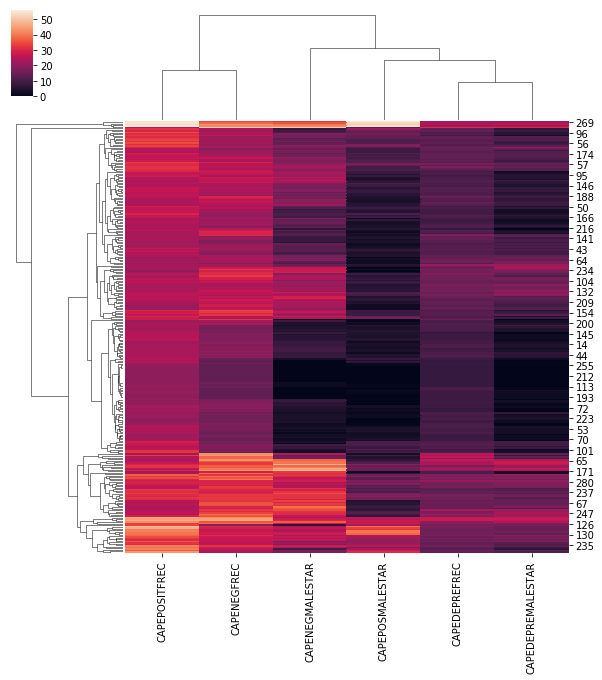

In [69]:
sns.clustermap(X) #Relación de las variables CAPE